In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import seaborn as sns
# from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv("pizza_sales.csv")
df=df.dropna(how='any')
cols=df.columns
cols

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

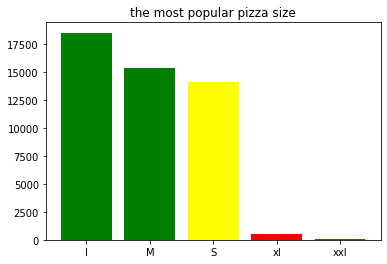

In [3]:
values=df['pizza_size'].value_counts().tolist()
plt.bar(['l','M','S','xl','xxl'],values,color=['green','green','yellow','red','red'])
plt.title('the most popular pizza size')
plt.show()


In [4]:
# '''''''
# What is the typical order size and spending pattern for customers?
# What are the most and least popular pizza names or ingredients?
# Are there any correlations between pizza category, size, and ingredients?
# Are there unique trends or preferences for specific pizza names?
# How many pizzas, on average, are included in a single order?
# What is the distribution of order sizes (number of pizzas per order)?
# Are there specific times of the day when pizza orders peak?
# Are there any significant price differences between pizza categories or sizes?
# How does total price relate to the quantity of pizzas ordered?
# Can you identify any price outliers or unusual pricing patterns?
# Where are the most orders placed geographically?
# Are there regional variations in pizza preferences or ordering behavior?
# Can you segment customers based on their ordering behavior, demographics, or preferences?
# What are the characteristics of different customer segments?
# Which ingredients are most commonly used in pizzas?
# Are there ingredient combinations that are particularly popular?
# Can you identify trends in ingredient usage over time?
# Are there any time periods with longer delivery times or higher order processing times?
# Can you identify any operational bottlenecks or inefficiencies?
# What items are often ordered together in the same order?
# Are there any cross-selling opportunities based on order patterns?
# Can you build predictive models to forecast future orders, sales, or customer behavior?'''''''

In [5]:
revenue=(df[cols[3]]*df[cols[6]]).sum()
print('TOTAL REVENUE:',revenue)


TOTAL REVENUE: 817860.05


In [6]:
print('THE AVG UNIT PRIZE OF PIZZA in $:',df[cols[6]].mean())

THE AVG UNIT PRIZE OF PIZZA in $: 16.494132044426163


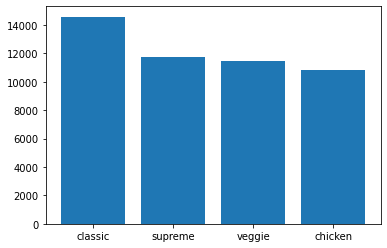

In [7]:
values=df[cols[9]].value_counts().tolist()
plt.bar(['classic','supreme','veggie','chicken'],values)
plt.show()



THE USERS ORDER:
PIZZA  QUANTITY
 1    47693
2      903
3       21
4        3
Name: quantity, dtype: int64


<BarContainer object of 4 artists>

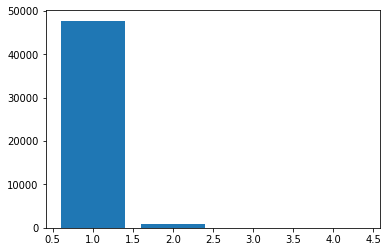

In [8]:
print('THE USERS ORDER:\nPIZZA  QUANTITY\n',df[cols[3]].value_counts())
plt.bar([1,2,3,4],df[cols[3]].value_counts())

#### MOST OF THE PEOPLE ORDERED 1 PIZZA AT AT TIME IN ONE ORDER

In [9]:
d={}
for i in range(len(df['order_id'])):
    if int(df['order_id'][i]) in d:
        d[int(df['order_id'][i])]+=int(df['quantity'][i])
    else:d[int(df['order_id'][i])]=1
key=max(d,key=d.get)
print('THE ORDER ID',key,"HAS THE PURCHASED THE MAXIMUM ORDER:",d[key])

THE ORDER ID 18845 HAS THE PURCHASED THE MAXIMUM ORDER: 26


In [10]:
# ['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
#        'order_time', 'unit_price', 'total_price', 'pizza_size',
#        'pizza_category', 'pizza_ingredients', 'pizza_name']

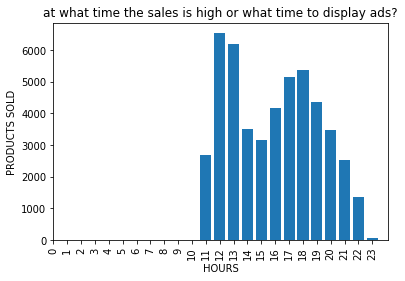

In [11]:
df['month']=df['order_date'].str.split('-').str[1]
df['time']=df['order_time'].str.split(':').str[0]
tempdic={}
for x in df['time'].unique():
    tempdic[int(x)]=0
for x in df['time']:
    for y in tempdic:
        if int(x)==int(y):
            tempdic[int(x)]+=1
plt.bar(tempdic.keys(),tempdic.values())
plt.title('at what time the sales is high or what time to display ads?')
plt.xticks(rotation=90)
plt.xticks(list(range(24)))
plt.xlabel("HOURS")
plt.ylabel("PRODUCTS SOLD")
plt.show()

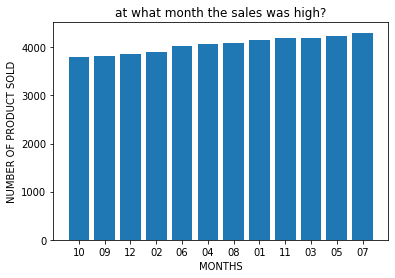

In [12]:
tempdic={}
for x in df['month'].unique():
    tempdic[x]=0
for x in df['month']:
    for y in tempdic:
        if x==y:
            tempdic[x]+=1
s=dict(sorted(tempdic.items(),key=lambda x:x[1]))
plt.bar(s.keys(),s.values())
plt.ylabel("NUMBER OF PRODUCT SOLD")
plt.xlabel("MONTHS")
plt.title('at what month the sales was high?')
plt.show()

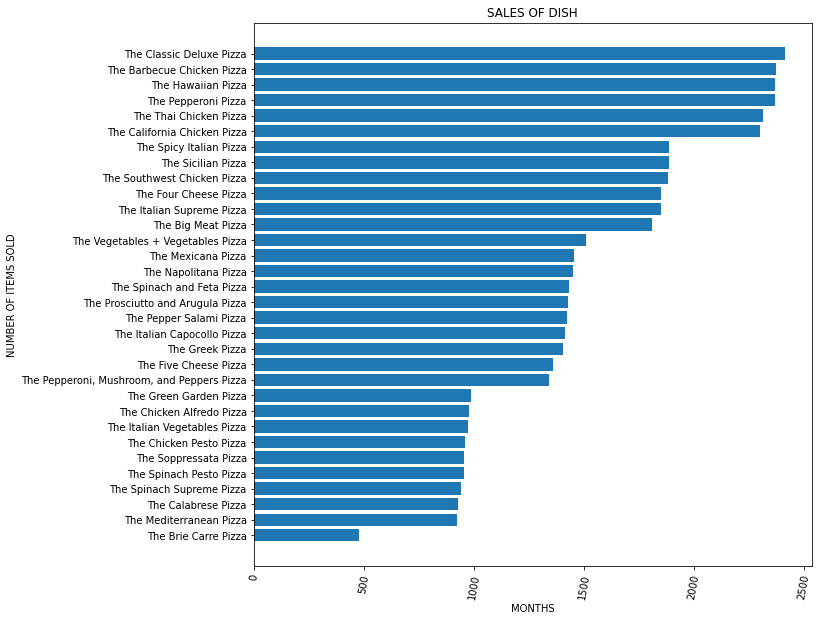

In [13]:
a=dict(df['pizza_name'].value_counts())
a=dict(sorted(a.items(),key=lambda x:x[1]))
key=list(a.keys())
lab=list(a.values())
plt.figure(figsize=(10,10))
plt.barh(key,width=lab,height=0.8)
plt.ylabel("NUMBER OF ITEMS SOLD")
plt.xlabel("MONTHS")
plt.title('SALES OF DISH')
plt.xticks(rotation=80)
plt.show()

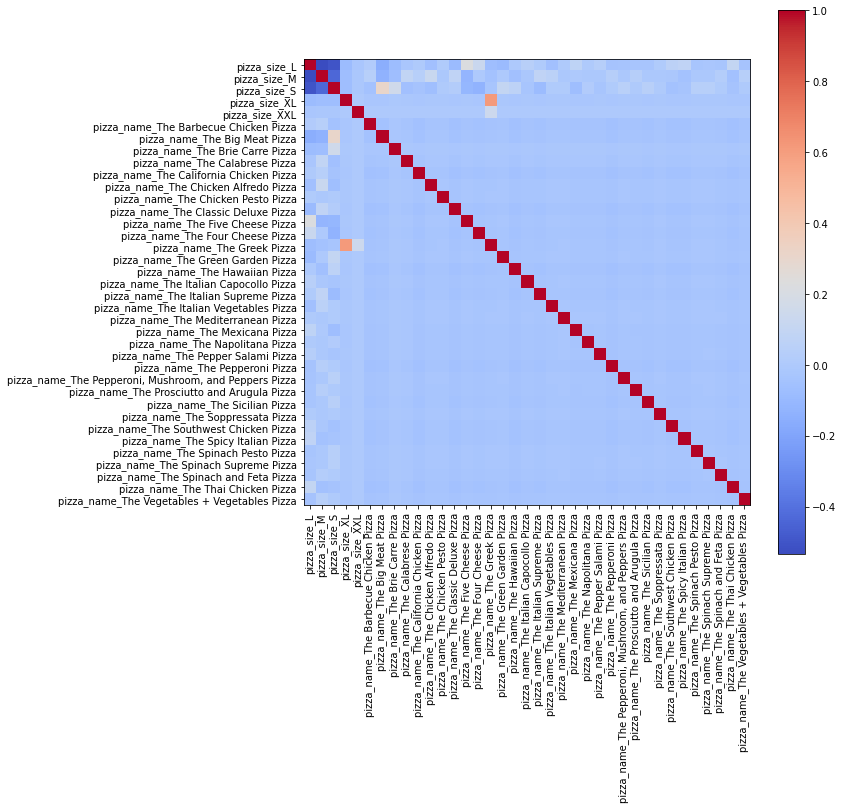

In [27]:
data = df[['pizza_size', 'pizza_name', 'time']]
data = pd.get_dummies(data, columns=['pizza_size', 'pizza_name'], prefix=['pizza_size', 'pizza_name'])
correlation_matrix = data.corr()
plt.figure(figsize=(10, 10))
plt.imshow(correlation_matrix, interpolation='nearest',cmap='coolwarm')
plt.colorbar()
x_labels = correlation_matrix.columns
x_positions = range(len(x_labels))
plt.xticks(x_positions, x_labels, rotation=90)
y_labels = correlation_matrix.columns
y_positions = range(len(y_labels))
plt.yticks(y_positions, y_labels)
plt.show()

In [15]:
# ['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
#        'order_time', 'unit_price', 'total_price', 'pizza_size',
#        'pizza_category', 'pizza_ingredients', 'pizza_name']

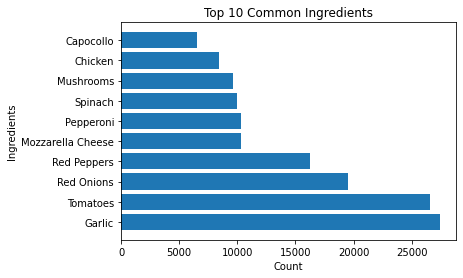

In [17]:
ingredients = df['pizza_ingredients'].str.split(', ').explode().value_counts()
plt.barh(ingredients.index[:10], ingredients.values[:10])
plt.xlabel("Count")
plt.ylabel("Ingredients")
plt.title("Top 10 Common Ingredients")
plt.show()

<Figure size 576x432 with 0 Axes>

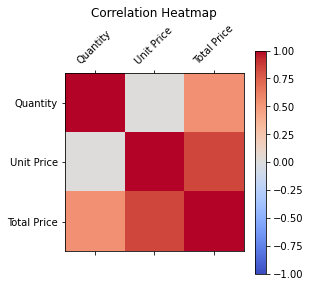

In [25]:
correlationmat = df[['quantity', 'unit_price', 'total_price']].corr()
plt.figure(figsize=(8, 6))
cax = plt.matshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(cax)
labels = ['Quantity', 'Unit Price', 'Total Price']
plt.xticks(np.arange(len(labels)), labels, rotation=45)
plt.yticks(np.arange(len(labels)), labels)
plt.title("Correlation Heatmap")
plt.show()